### Step 1: Import Libraries and Load Data
First, we need to import the necessary libraries and load the data. We'll use pandas for data


In [1]:
import pandas as pd

As an example, we'll look at data about home prices in Melbourne, Australia. In the hands-on exercises, you will apply the same processes to a new dataset, which has home prices in Iowa.
We load and explore the data with the following commands:

In [2]:
# save filepath to variable for easier access
melbourne_file_path = 'melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [3]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

 The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
 So we will take the simplest option for now, and drop houses from our data.
 Don't worry about this much for now, though the code is:


 dropna drops missing values 

In [4]:
melbourne_data[[column for column in melbourne_data.columns if melbourne_data[column].dtype != 'object']]

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


Those data are datas that are not objects we'll use the mean to fill the na of relevent columns

In [5]:
round(melbourne_data['Rooms'].mean())

3

We can distinguish multiple datas that contains NA so we're going to fill them with the appropriate function

In [6]:
melbourne_data['Car'] = melbourne_data['Car'].fillna(round(melbourne_data['Car'].mean()))
melbourne_data['Bedroom2'] = melbourne_data['Bedroom2'].fillna(round(melbourne_data['Bedroom2'].mean()))
#on remplace avec la valeur int inferieure car chaque maison auras au moin une salle de bain (logiquement)
melbourne_data['Bathroom'] = melbourne_data['Bathroom'].fillna(melbourne_data['Bathroom'].mean().astype(int))
melbourne_data['Rooms'] = melbourne_data['Rooms'].fillna(melbourne_data['Rooms'].mean())

In [7]:
melbourne_data = melbourne_data.dropna(axis=0)

### Selecting The Prediction Target
We can pull out a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y. So the code we need to save the house prices in the Melbourne data is

In [8]:
y = melbourne_data.Price

Choosing "Features"
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

In [9]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [10]:
X = melbourne_data[melbourne_features]

Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.

In [11]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [12]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [13]:
X.shape

(6196, 5)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

So we can train our model we need to split some of the values into tests so we can determine our model accuracy

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4151, 5)
(2045, 5)
(4151,)
(2045,)


In [17]:
import keras
from keras import models
from keras import layers

since our model is for classification (using numbers) we can use these prameters to make our model

In [18]:
model_1=models.Sequential()
model_1.add(layers.Dense(64,activation='relu',input_shape=(5,)))
model_1.add(layers.Dense(64,activation='relu'))
model_1.add(layers.Dense(1, activation='linear',name='layer3'))
model_1.add(layers.Dense(1))

c:\Users\knigh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


let's do a quick summary of our model to ensure everything is alright before we start the training

In [19]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,611 (18.01 KB)

 Trainable params: 4,611 (18.01 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_1.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history=model_1.fit(X_train,y_train,epochs=100,batch_size=128)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1652561936384.0000 - mae: 1087844.6250
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 1604404510720.0000 - mae: 1064553.0000
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 1625990889472.0000 - mae: 1072352.7500
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 1720625266688.0000 - mae: 1095000.2500
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 1579538317312.0000 - mae: 1057196.7500
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 1589294399488.0000 - mae: 1062627.1250
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 1631815598080.0000 - mae: 1075216.8750
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 1599044583424.0000 - mae: 1051139.5000
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 1620282048512.0000 - mae: 1059058.7500 
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 1579127144448.0000 - mae: 1040911.0000


In [75]:
import matplotlib.pyplot as plt

From onward we'll juste see if our model can accuratly predict the price of houses

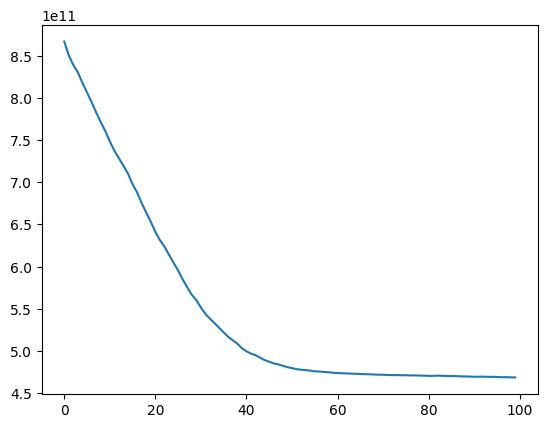

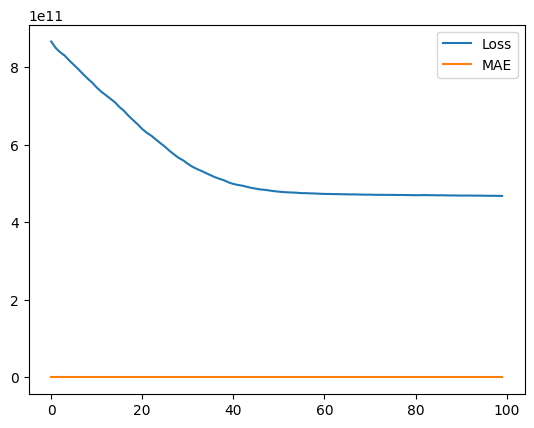

In [78]:
plt.figure()
plt.plot(history.history['loss'])
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['mae'], label='MAE')
plt.legend()
plt.show()

In [79]:
prediction=model_1.predict(X_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [77]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
import numpy as np

In [80]:
pred=pd.DataFrame({
          'MSE':[mean_squared_error(y_test, prediction)],
          'RMSE':[np.sqrt(mean_squared_error(y_test, prediction))],
          'MAE':[mean_absolute_error(y_test, prediction)],
          'R2':[r2_score(y_test, prediction)]

  })

In [81]:
pred

,MSE,RMSE,MAE,R2
0,3.885099e+11,623305.65779,470017.582213,0.034869


In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
models={
    'reg_lin':linear_model.LinearRegression(),
    'rend_for':RandomForestRegressor(),
    'SVR':SVR(),
    'decision_tree':DecisionTreeRegressor()
}


let's use different models to test out models and then compare them one another

##################################################
Model: reg_lin
----------


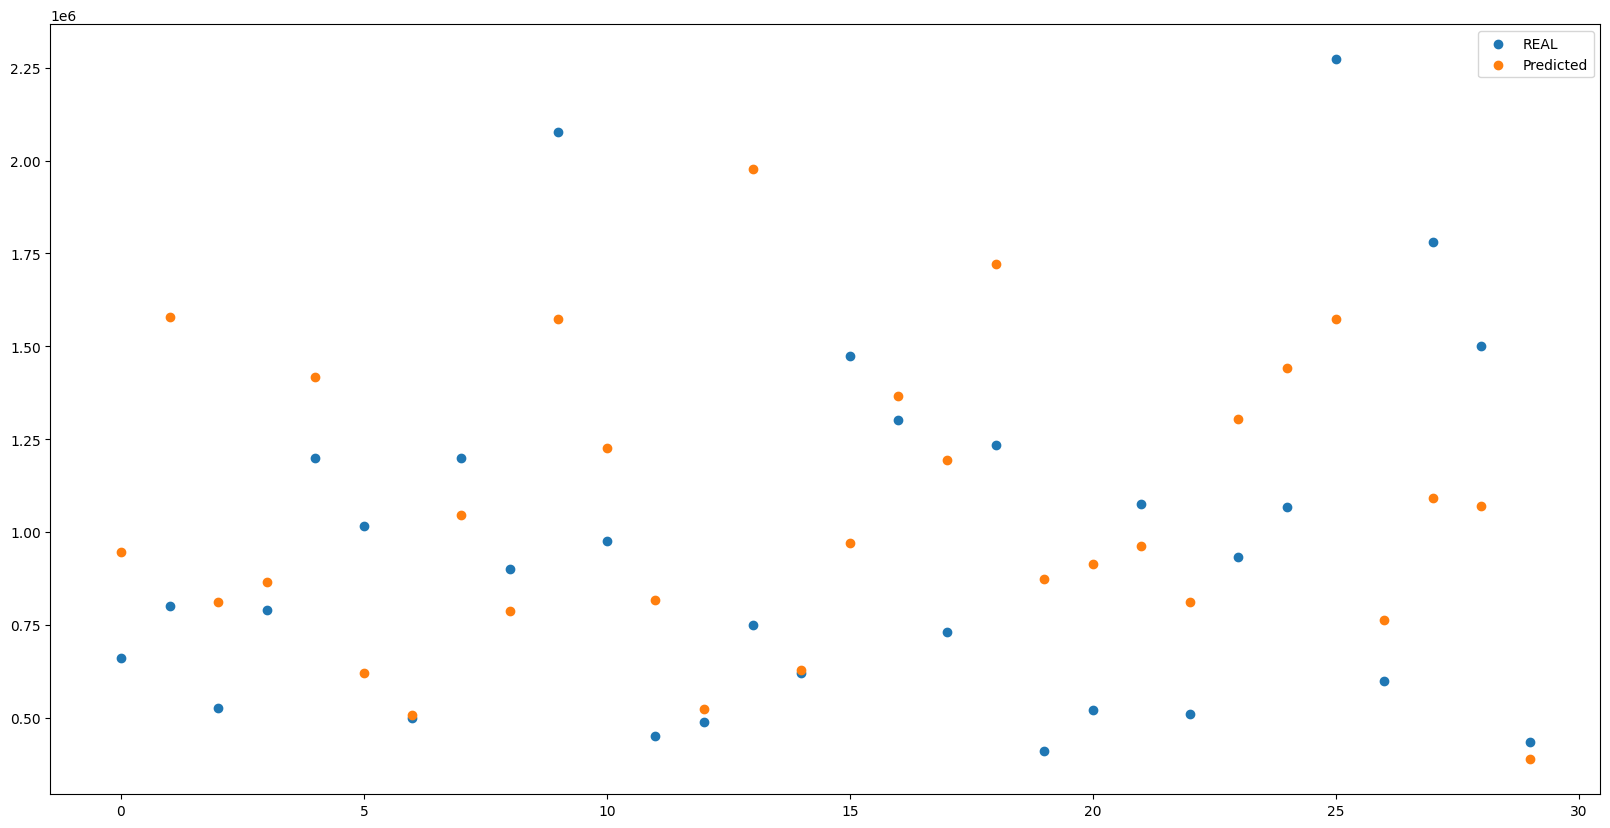

##################################################
Model: rend_for
----------


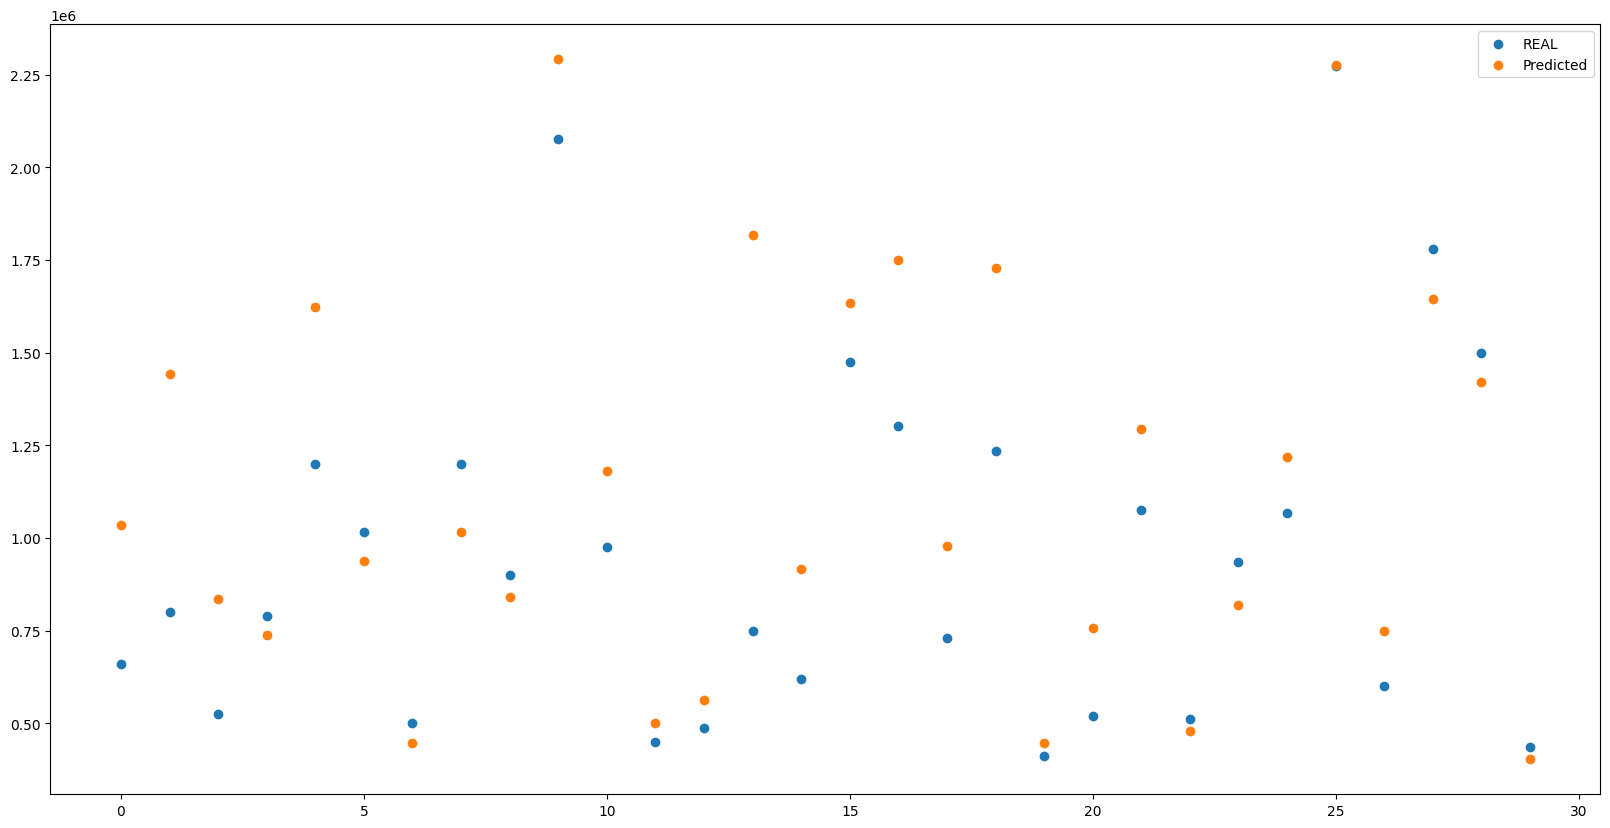

##################################################
Model: SVR
----------


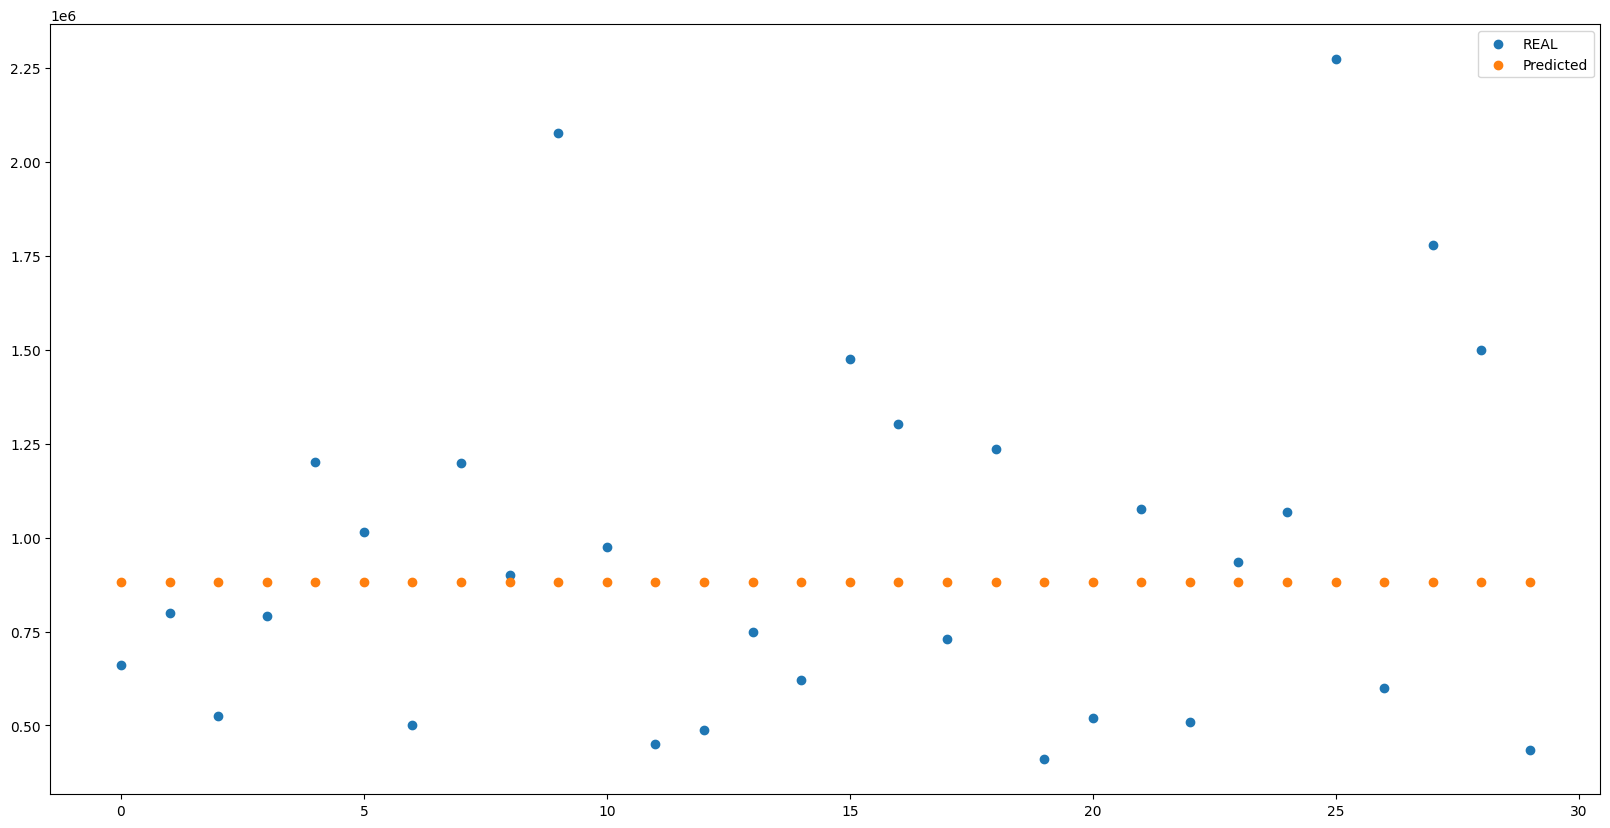

##################################################
Model: decision_tree
----------


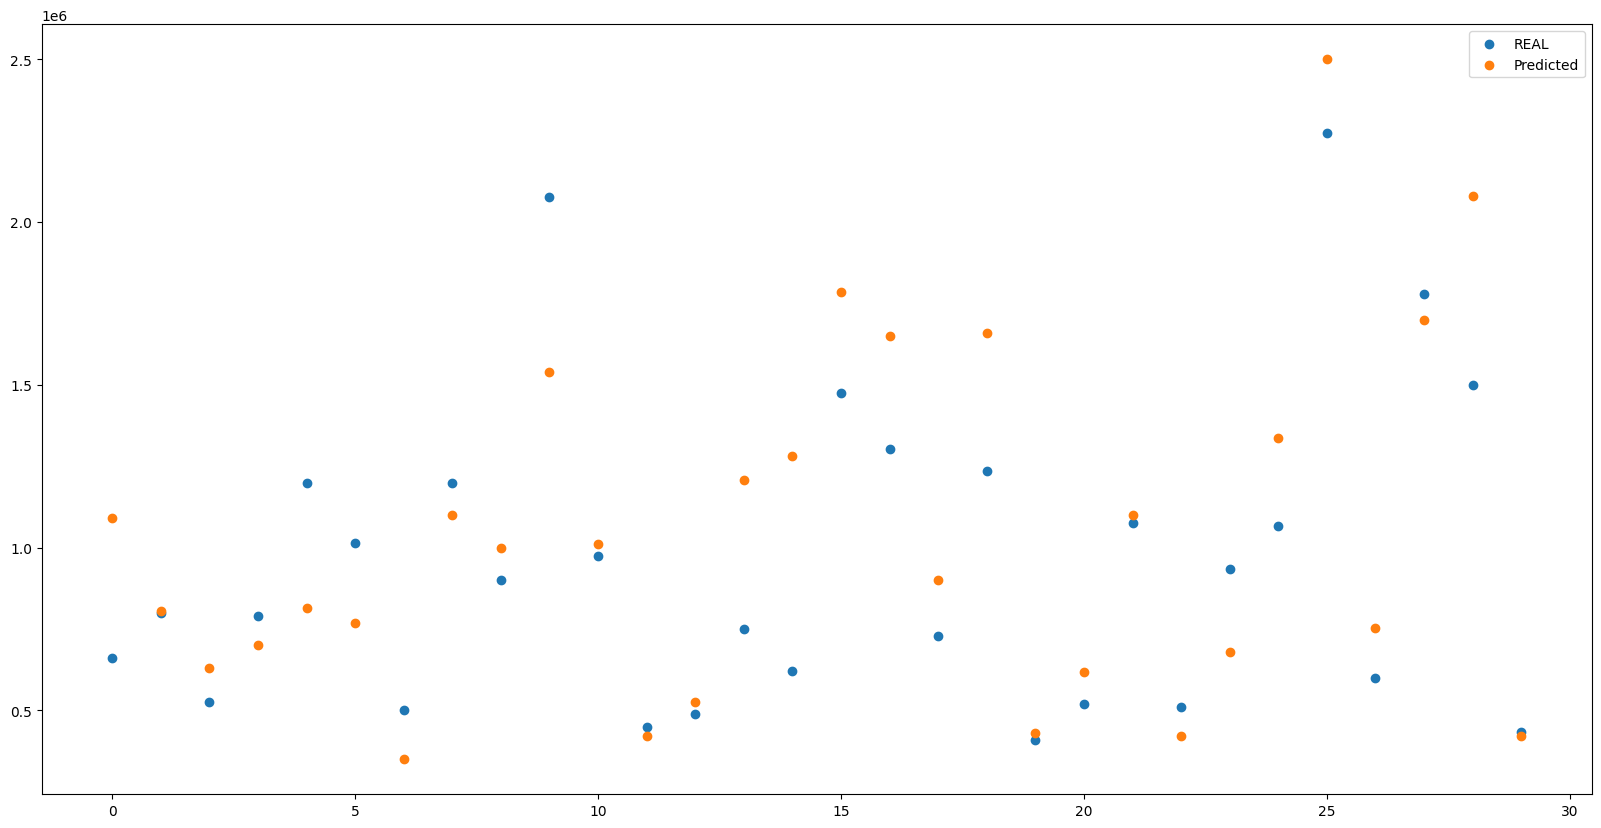

In [87]:
scores_df=pd.DataFrame()

for model_name, model in models.items():
  print("#"*50)
  print(f"Model: {model_name}")
  print("-"*10)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  scores_df=pd.concat([
      scores_df,
      pd.DataFrame({
          'Model':[model_name],
          'MSE':[mean_squared_error(y_test, prediction)],
          'RMSE':[np.sqrt(mean_squared_error(y_test, prediction))],
          'MAE':[mean_absolute_error(y_test, prediction)],
          'R2':[r2_score(y_test, prediction)]

  })])

  plt.figure(figsize=(20,10))
  plt.scatter(x=range(30),y=y_test[:30], label='REAL')
  plt.scatter(x=range(30),y=prediction[:30], label='Predicted')
  plt.legend()
  plt.show()

We can see that we got rather bad values if we compare it to what we usualy see but these metrics are actually good (except for SVR) since the scale of our target variable is pretty high.

In [91]:
scores_df

,Model,MSE,RMSE,MAE,R2
0,reg_lin,2.482015e+11,498198.292431,353958.583672,0.383421
0,rend_for,8.485558e+10,291299.816438,191243.277037,0.789203
0,SVR,4.321200e+11,657358.361430,447403.194512,-0.073467
0,decision_tree,2.578854e+11,507824.165712,266131.058517,0.359365


since decision tree seems to be the best model in our case let's reuse it and study it

In [99]:
melbourne_model=DecisionTreeRegressor(random_state=1)
melbourne_model.fit(X_train, y_train)

print("The predictions are")
print(melbourne_model.predict(X.head()))

The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [100]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [101]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

87968.07628577578

In [102]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

273260.5560576716


In [103]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

let's train our model depending on different number of leafs and see if this gives any changes


and it seems like the best number is between 50 and 500

In [104]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271320


let's compare it with the default 


we can see that we get a better MAE 

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

207190.6873773146
